# Regression Analysis using Linear Algebra and NumPy 

## Introduction

In the previous sections, you learned that in statistical modeling, regression analysis is a set of statistical processes for estimating the relationships between data entities (variables). Linear regression is an important predictive analytical tool in the data scientist's toolbox. Here, you'll try and develop a basic intuition for regression from a linear algebra perspective using vectors and matrix operations. This lesson covers least-squares regression with matrix algebra without digging deep into the geometric dimensions. 

[You can find a deeper mathematical and geometric explanation of the topic here](http://math.mit.edu/~gs/linearalgebra/ila0403.pdf). In this lesson, we'll try to keep things more data-oriented.

## Objectives

You will be able to: 

- Apply linear algebra to fit a function to data, describing linear mappings between input and output variables
- Indicate how linear algebra is related to regression modeling


## Regression analysis

By now, you know that the purpose of the regression process is to fit a mathematical model to a set of observed points, in order to later use that model for predicting new values e.g. predicting sales, based on historical sales figures, predicting house prices based on different features of the house, etc. 

Let's use a very simple toy example to understand how this works with linear algebra. Say you are collecting data on total number of sales per day for some business. Imagine you've got three data points in the format: 

(day, total number of sales(in hundreds)) 

> (1, 1) , (2, 2) , (3, 2)

If we plot these points on a scatter plot with day (x-axis) vs. sales figures (y-axis), this is what we get:

```python
import matplotlib.pyplot as plt
import numpy as np

x = np.array([1,2,3])
y = np.array([1,2,2])
               
plt.plot(x, y, 'o')
plt.xticks(x)

plt.show()
```

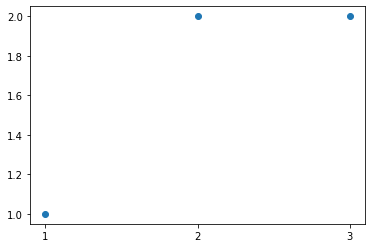

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([1,2,3])
y = np.array([1,2,2])

plt.plot(x, y, 'o')
plt.xticks(x)

plt.show()

## Fitting a model to data - A quick refresher

The purpose of linear regression would be to fit a mathematical model (a straight line) in the parameter space  that best describes the relationship between day and sales. Simple linear regression attempts to fit a line (in a 2-dimensional space) to describe the relationship between two variables as shown in the example below:

<img src ="../../images/new_regr_line.png" width="500">


Following this, if you were to identify a relationship between the day and total number of sales, the goal would be to seek a function that describes this line and allows us to linearly map input data points (day) or **independent variable** to outcome values (sales) or **dependent variable**.  If you do this, you first assume that there is an underlying relationship that maps “days” uniquely to “number of sales”, that can be written in the function form as an equation of the straight line i.e. 


$$y = mx+c$$


where $c$ is the intercept of the line and $m$ denotes the slope, as shown below: 

<img src="../../images/new_regression.png" width ="400">



We can write the fitting function based on the above as sales being a **function** of days.

$$ \text{sales} = f(\text{days})$$


or, from $y= mx+c$

$$\text{sales} = \text{days}*x + \text{intercept} $$
>(where **y** is the number of sales per day and **x** represents the day. **c** (intercept) and **m** (slope) are the regression coefficients we are looking for hoping that these co-efficients will linearly map **day** to the **number of sales**). 

So using this, we can show our three data points ((1, 1) , (2, 2) , (3, 2)) as:

> $c + m*1 = 1$

> $c + m*2 = 2$

> $c + m*3 = 2$


We can see that our data points do not lie on a line. The first two points make a perfect linear system. When $x = 1$, $y = 1$; and when $x = 2$, $y = 2$ i.e. we can draw a straight line passing through these points. When x = 3, b = 2, you know the three points do not lie on the same line as first two points, and our model will be an **approximation** i.e. 
> there will be some error between the straight line and the REAL relationship between these parameters. 

This behavior can be simulated by using NumPy's `polyfit()` function (similar to `statsmodels.ols`) to draw a regression line to the data points as shown below. [Here is the documentation for np.polyfit()](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.polyfit.html). 

```python
from numpy.polynomial.polynomial import polyfit

# Fit with polyfit function to get c(intercept) and m(slope)
# the degree parameter = 1 to models this as a straight line
c, m = polyfit(x, y, 1)

# Plot the data points and line calculated from ployfit
plt.plot(x, y, 'o')
plt.plot(x, c + (m * x), '-')
plt.xticks(x)

plt.show()
print(b,m)
```

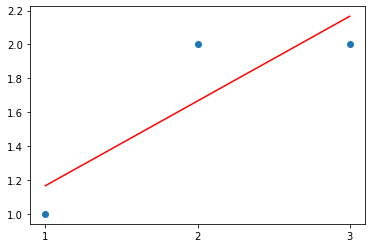

0.6666666666666667 0.5000000000000001


In [4]:
from numpy.polynomial.polynomial import polyfit

# Fit with polyfit function to get c(intercept) and m(slope)
# the degree parameter = 1 to models this as a straight line
c, m = polyfit(x, y, 1)

# Plot the data points and line calculated from ployfit
plt.plot(x, y, 'o')
plt.plot(x, c + (m * x), '-' , color="r")
plt.xticks(x)

plt.show()
print(c,m)

The numbers obtained here reflect the slope (0.5) and intercept values (0.66). 

The line drawn above using this built-in regression model clearly doesn't touch all the data points. As a result, this is an **approximation** of the function you're trying to find. Now let's see how to achieve the same functionality with matrix algebra instead of the `polyfit()` function. 

## Create matrices and vectors

A linear system like the one above can be solved using linear algebra! You only need to deal with a few vectors and matrices to set this up.

Recalling linear systems from the previous lessons, you have:


$$
    \left[ {\begin{array}{cc}
   1 & 1 \\
   1 & 2 \\
   1 & 3 \\
  \end{array} } \right]
   \left[ {\begin{array}{c}
   c \\
   m \\
  \end{array} } \right] =
    \left[ {\begin{array}{c}
    1 \\
    2 \\
    2 \\
  \end{array} } \right] 
$$


## The intercept and error terms

The column of ones in the first matrix refers to the intercept ($c$) from $mx+c$. If you don't include this constant, then the function is constrained to the origin (0,0), which would strongly limit the types of relationships the model could describe. You want to include an intercept to allow for linear models to intersect with the $y$-axis at values different from 0 (in the image shown earlier, $c$ was 2, because the straight line crossed the $y$-axis at $y$=2).

In above , we are hoping that there is some linear combination of the columns of the first matrix that gives us our vector of observed values (the vector with values 1,2,2).

Unfortunately, we already know that this vector does not fit our model perfectly. That means it is outside the column space of A and we can't solve that equation for the vector $x$ directly. Every line we draw will have some value of **error** $e$ associated with it. 

**The goal is to choose the vector $x$ for unknown variables to make $e$ as small as possible**. 

## Ordinary least squares 

A common measure to find and minimize the value of this error is called *Ordinary Least Squares*. 

This says that our dependent variable, is composed of a linear part and error. The linear part is composed of an intercept and independent variable(s), along with their associated raw score regression weights.

In matrix terms, the same equation can be written as:

$ y = \boldsymbol{X} b + e $

This says to get y (sales), multiply each $\boldsymbol{X}$ by the appropriate vector b (unknown parameters, the vector version of $m$ and $c$), then add an error term. We create a matrix $\boldsymbol{X}$ , which has an extra column of **1**s in it for the intercept. For each day, the **1** is used to add the intercept in the first row of the column vector $b$.

Let's assume that the error is equal to zero on average and drop it to sketch a proof:

$ y = \boldsymbol{X} b$


Now let's solve for $b$, so we need to get rid of $\boldsymbol{X}$. First we will make X into a nice square, symmetric matrix by multiplying both sides of the equation by $\boldsymbol{X}^T$ :

$\boldsymbol{X}^T y = \boldsymbol{X}^T \boldsymbol{X}b $

And now we have a square matrix that with any luck has an inverse, which we will call $(\boldsymbol{X}^T\boldsymbol{X})^{-1}$. Multiply both sides by this inverse, and we have

$(\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T y =(\boldsymbol{X}^T\boldsymbol{X})^{-1} \boldsymbol{X}^T \boldsymbol{X}b $


It turns out that a matrix multiplied by its inverse is the identity matrix $(\boldsymbol{X}^{-1}\boldsymbol{X})= I$:

$(\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T y =I b $


And you know that $Ib= b$ So if you want to solve for $b$ (that is, remember, equivalent to finding the values $m$ and $c$ in this case), you find that:

$ b= (\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T y $

Here, we'll focus on the matrix and vector algebra perspective. With least squares regression, in order to solve for the expected value of weights, referred to as $\hat{X}$ ("$X$-hat"), you need to solve the above equation. 

Remember all above variables represent vectors. The elements of the vector X-hat are the estimated regression coefficients $c$ and $m$ that you're looking for. They minimize the error between the model and the observed data in an elegant way that uses no calculus or complicated algebraic sums.

The above description can be summarized as:

**Using linear regression is just trying to solve $Xb = y$. But if any of the observed points deviate from the model, you can't find a direct solution. To find a solution, you can multiply both sides by the transpose of $X$. The transpose of $X$ times $X$ will always allow us to solve for unknown variables.**

## Calculate an OLS regression line

Let's use the above formula to calculate a solution for our toy problem: 
```python
# Calculate the solution

X = np.array([[1, 1],[1, 2],[1, 3]])
y = np.array([1, 2, 2])
Xt = X.T
XtX = Xt.dot(X)
XtX_inv = np.linalg.inv(XtX)
Xty = Xt.dot(y)
x_hat = XtX_inv.dot(Xty) # the value for b shown above
x_hat
```

In [5]:
X = np.array([[1, 1],[1, 2],[1, 3]])
y = np.array([1, 2, 2])
Xt = X.T
XtX = Xt.dot(X)
XtX_inv = np.linalg.inv(XtX)
Xty = Xt.dot(y)
x_hat = XtX_inv.dot(Xty) # the value for b shown above
x_hat

array([0.66666667, 0.5       ])

&#9989; The solution gives an intercept of 0.6 and slope value 0.5. Let's see what you get if you draw a line with these values with given data:

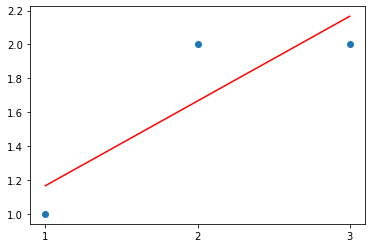

In [7]:
# Define data points
x = np.array([1, 2, 3])
y = np.array([1, 2, 2])

# Plot the data points and line parameters calculated above
plt.plot(x, y, 'o')
plt.plot(x, x_hat[0] + (x_hat[1] * x), '-' , color="red")
plt.xticks(x)

plt.show()

There you have it, an approximated line function! Just like the one you saw with `polyfit()`, by using simple matrix algebra. 

## Regression with multiple variables

Above, you saw how you can draw a line on a 2D space using simple regression. If you perform a similar function with multiple variables, you can have a parameter space that is not 2D. With 3 parameters, i.e. two input and one output feature, the fitting function would not be a line, but would look like a plane:

<img src="../../images/new_LinRegresChart.png" width="600">

When you have more than one input variable, each data point can be seen as a feature vector $x_i$, composed of $x_1, x_2, \ldots , x_m$ , where $m$ is the total number of features (columns). For multiple regression, each data point can contain two or more features of the input. To represent all of the input data along with the vector of output values we set up a input matrix *X* and an output vector *y*. 

you can write this in general terms, as you saw earlier:
 
> $\boldsymbol{X} \beta \approx y$


Where *X* are the input feature values, $\beta$ represents the coefficients and *y* is the output (value to be predicted). In a simple least-squares linear regression model you are looking for a vector $\beta$ so that the product $X \beta$ most closely approximates the outcome vector y.

For each value of input features $x_i$, we can compute a predicted outcome value as:

observed data $\rightarrow$ $y = b_0+b_1x_1+b_2x_2+ \ldots + b_px_p+ \epsilon $

predicted data $\rightarrow$ $\hat y = \hat b_0+\hat b_1x_1+\hat b_2x_2+ \ldots + \hat b_px_p $

error $\rightarrow$ $\epsilon = y - \hat y $

Just like before,  the formula to compute the beta vector remains:

$ \large b= (\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T y $


So you see that the general solution involves taking a matrix transpose, the inverse, and dot multiplications on the lines of solving a linear system of equations. 

In the next lab, you'll use a simple dataset and with the above formulation for multivariate regression, you'll try to fit a model to the data and see how well it performs. 



# Regression with Linear Algebra - Exercise

In this lab, you'll apply regression analysis using simple matrix manipulations to fit a model to given data, and then predict new values for previously unseen data. You'll follow the approach highlighted in the previous lesson where you used NumPy to build the appropriate matrices and vectors and solve for the $\beta$ (unknown variables) vector. The beta vector will be used with test data to make new predictions. You'll also evaluate the model fit.
In order to make this experiment interesting, you'll use NumPy at every single stage of this experiment, i.e., loading data, creating matrices, performing train-test split, model fitting, and evaluation.
  

## Objectives

In this lab you will:

- Use matrix algebra to calculate the parameter values of a linear regression


First, let's import necessary libraries:

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Dataset 

The dataset you'll use for this experiment is "**Sales Prices in the City of Windsor, Canada**", something very similar to the Boston Housing dataset. This dataset contains a number of input (independent) variables, including area, number of bedrooms/bathrooms, facilities(AC/garage), etc. and an output (dependent) variable, **price**.  You'll formulate a linear algebra problem to find linear mappings from input features using the equation provided in the previous lesson. 

This will allow you to find a relationship between house features and house price for the given data, allowing you to find unknown prices for houses, given the input features.  

A description of the dataset and included features is available [here](https://rdrr.io/cran/Ecdat/man/Housing.html).

In your repository, the dataset is available as `windsor_housing.csv`. There are 11 input features (first 11 columns):

	lotsize	bedrooms  bathrms  stories	driveway  recroom	fullbase  gashw	 airco  garagepl   prefarea

and 1 output feature i.e. **price** (12th column). 

The focus of this lab is not really answering a preset analytical question, but to learn how you can perform a regression experiment, using mathematical manipulations - similar to the one you performed using `statsmodels`. So you won't be using any `pandas` or `statsmodels` goodness here. The key objectives here are to: 

- Understand regression with matrix algebra and 
- Mastery in NumPy scientific computation

## Stage 1: Prepare data for modeling 

Let's give you a head start by importing the dataset. You'll perform the following steps to get the data ready for analysis:

* Initialize an empty list `data` for loading data
* Read the csv file containing complete (raw) `windsor_housing.csv`. [Use `csv.reader()` for loading data.](https://docs.python.org/3/library/csv.html). Store this in `data` one row at a time 

* Drop the first row of csv file as it contains the names of variables (header) which won't be used during analysis (keeping this will cause errors as it contains text values) 

* Append a column of all **1**s to the data (bias) as the first column

* Convert `data` to a NumPy array and inspect first few rows 

> NOTE: `read.csv()` reads the csv as a text file, so you should convert the contents to float.

In [14]:
df = pd.read_csv("../../data/windsor_housing.csv")
df.head()

,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,price
0,5850,3,1,2,1,0,1,0,0,1,0,42000
1,4000,2,1,1,1,0,0,0,0,0,0,38500
2,3060,3,1,1,1,0,0,0,0,0,0,49500
3,6650,3,1,2,1,1,0,0,0,0,0,60500
4,6360,2,1,1,1,0,0,0,0,0,0,61000


In [17]:
print("Windsor House data has" , df.shape[0] ,"rows and" , df.shape[1] ,"columns") 

Windsor House data has 546 rows and 12 columns


In [ ]:
# Create an Empty list to store x and y variables
data = []

# read the data from the csv file
with open("windsor_housing.csv") as f:
    raw = csv.reader(f)
    # drop the first line of columns
    next(raw)
    # read one row

## Further reading

You're strongly advised to visit the following links to develop a strong mathematical and geometrical intuition around how least squares work. These documents will provide you with a visual intuition as well as an in-depth mathematical formulation for above equations along with their proofs. 

* [Quora: Why do we need an extra column of ones in regression](https://www.quora.com/Why-do-we-add-an-extra-column-in-1-matrix-to-solve-normal-equation-in-linear-regression)

* [An excellent visual demonstration of oridnary least squares](http://setosa.io/ev/ordinary-least-squares-regression/)

* [Simple Regression in Matrix format](https://www.stat.cmu.edu/~cshalizi/mreg/15/lectures/13/lecture-13.pdf)

## Summary

In this lesson, you had a gentle introduction to how we can use linear algebra to solve regression problems. You saw a toy example in the case of simple linear regression, relating days to number of sales and calculated a function that approximates the linear mapping.

You also learned about how linear regression works in the context of multiple input variables and linear algebra. In the next lab, you'll use these equations to solve a real world problem. 